In [1]:
import pandas as pd
# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# # WEEKS = list(range(1, 18))
WEEKS = [16]

data = pd.DataFrame()

#ingest
for week in WEEKS:
    data = data.append(pd.read_csv(f"./data/week{week}.csv", low_memory=False).reset_index(drop=True), sort=True)
# data = pd.read_csv('./data/weektoy.csv', low_memory=False)
data.reset_index(drop=True, inplace=True)
# data.head(100000).to_csv('./data/toy.csv', index=False)

In [2]:
los = data.loc[(data.displayName=='Football') & (data.event=='ball_snap')][['gameId', 'playId', 'x']].rename({'x': 'los'}, axis=1).set_index(['gameId', 'playId'])
data = data.join(los, on=['gameId','playId'])
data

,a,dir,dis,displayName,event,frameId,gameId,jerseyNumber,nflId,o,playDirection,playId,position,route,s,team,time,x,y,los
0,0.00,21.27,0.00,Josh Johnson,None,1,2018122200,8.0,264.0,78.10,right,88,QB,NaN,0.00,away,2018-12-22T21:31:56.500Z,40.71,23.78,41.98
1,0.52,196.09,0.07,Wesley Woodyard,None,1,2018122200,59.0,2354.0,274.14,right,88,ILB,NaN,0.66,home,2018-12-22T21:31:56.500Z,46.31,24.08,41.98
2,0.01,20.48,0.01,Derrick Morgan,None,1,2018122200,91.0,496828.0,299.04,right,88,OLB,NaN,0.01,home,2018-12-22T21:31:56.500Z,43.03,18.30,41.98
3,0.00,166.34,0.00,Adrian Peterson,None,1,2018122200,26.0,2507164.0,120.07,right,88,RB,OUT,0.00,away,2018-12-22T21:31:56.500Z,34.04,23.91,41.98
4,1.40,175.90,0.34,Michael Floyd,None,1,2018122200,17.0,2532841.0,143.48,right,88,WR,GO,3.31,away,2018-12-22T21:31:56.500Z,38.85,19.78,41.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144032,0.81,74.31,0.64,Nicholas Morrow,None,109,2018122400,50.0,2559054.0,69.08,left,4129,ILB,NaN,6.38,home,2018-12-25T04:09:22.700Z,81.92,30.32,101.05
1144033,2.52,62.80,0.73,Royce Freeman,None,109,2018122400,28.0,2560733.0,47.51,left,4129,RB,POST,7.21,away,2018-12-25T04:09:22.700Z,82.95,24.74,101.05
1144034,0.94,53.12,0.27,Courtland Sutton,None,109,2018122400,14.0,2560888.0,53.62,left,4129,WR,POST,2.70,away,2018-12-25T04:09:22.700Z,64.02,41.27,101.05
1144035,0.50,27.68,0.31,DaeSean Hamilton,None,109,2018122400,17.0,2561002.0,18.36,left,4129,WR,GO,3.12,away,2018-12-25T04:09:22.700Z,65.24,13.46,101.05


In [3]:
# def normRows(r):
#     # translate los
#     r['los_norm'] = 40
#     r['x_norm'] = r['x']-(r['los']-r['los_norm'])
#     r['y_norm'] = r['y']

#     # flip field if play is left
#     if r['playDirection']=='left':
#         r['x_norm'] = (r['los_norm']-r['x_norm'])+r['los_norm']
#         r['y_norm'] = (53.3/2-r['y_norm'])+53.3/2

#     return r
        
# data = data.apply(lambda r: normRows(r), axis=1)

data['los_norm'] = 40
data['x_norm'] = data['x']-(data['los']-data['los_norm'])
data['y_norm'] = data['y']
data.loc[data.playDirection == 'left', 'x_norm'] = (
    data['los_norm']-data['x_norm'])+data['los_norm']
data.loc[data.playDirection == 'left', 'y_norm'] = (
    53.3/2-data['y_norm'])+53.3/2

data.head()

,a,dir,dis,displayName,event,frameId,gameId,jerseyNumber,nflId,o,playDirection,playId,position,route,s,team,time,x,y,los,los_norm,x_norm,y_norm
0,0.00,21.27,0.00,Josh Johnson,None,1,2018122200,8.0,264.0,78.10,right,88,QB,NaN,0.00,away,2018-12-22T21:31:56.500Z,40.71,23.78,41.98,40,38.73,23.78
1,0.52,196.09,0.07,Wesley Woodyard,None,1,2018122200,59.0,2354.0,274.14,right,88,ILB,NaN,0.66,home,2018-12-22T21:31:56.500Z,46.31,24.08,41.98,40,44.33,24.08
2,0.01,20.48,0.01,Derrick Morgan,None,1,2018122200,91.0,496828.0,299.04,right,88,OLB,NaN,0.01,home,2018-12-22T21:31:56.500Z,43.03,18.30,41.98,40,41.05,18.30
3,0.00,166.34,0.00,Adrian Peterson,None,1,2018122200,26.0,2507164.0,120.07,right,88,RB,OUT,0.00,away,2018-12-22T21:31:56.500Z,34.04,23.91,41.98,40,32.06,23.91
4,1.40,175.90,0.34,Michael Floyd,None,1,2018122200,17.0,2532841.0,143.48,right,88,WR,GO,3.31,away,2018-12-22T21:31:56.500Z,38.85,19.78,41.98,40,36.87,19.78


In [4]:
plays = list(data.groupby(['gameId', 'playId'], as_index=False).first()[['gameId', 'playId']].to_records(index=False))
tipped_plays = list(data.query('event=="pass_tipped"').groupby(['gameId', 'playId'], as_index=False).first()[['gameId', 'playId']].to_records(index=False))

In [5]:
plays_df = pd.read_csv("./data/plays.csv", low_memory=False)
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


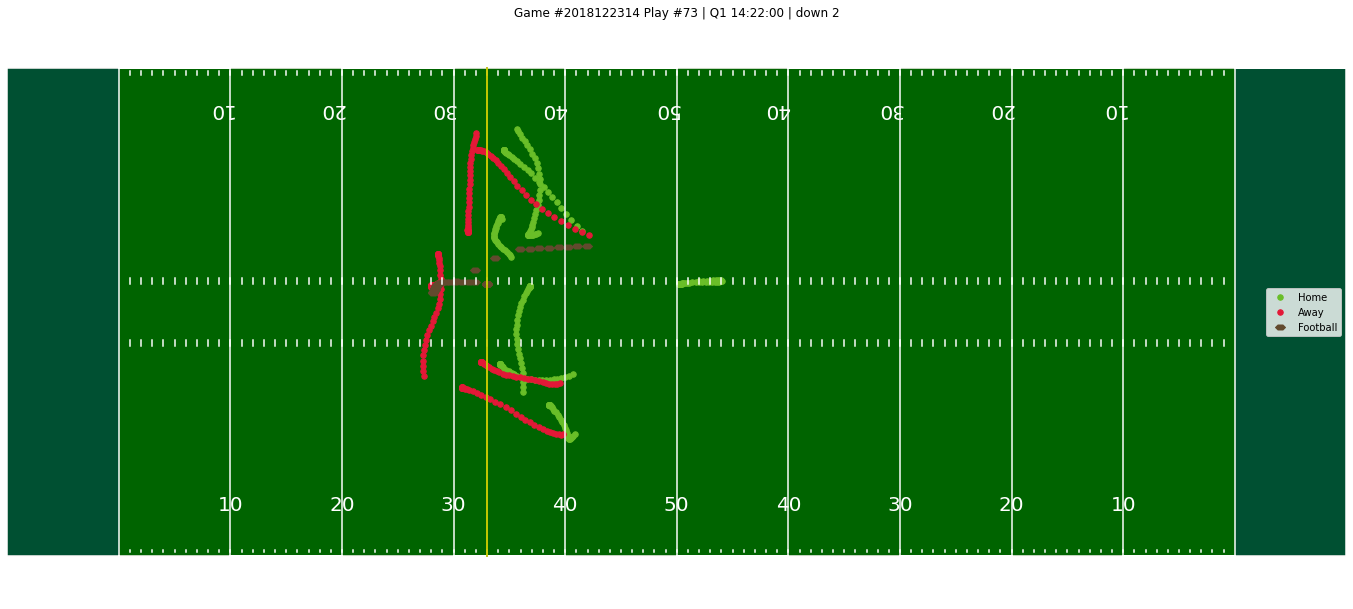

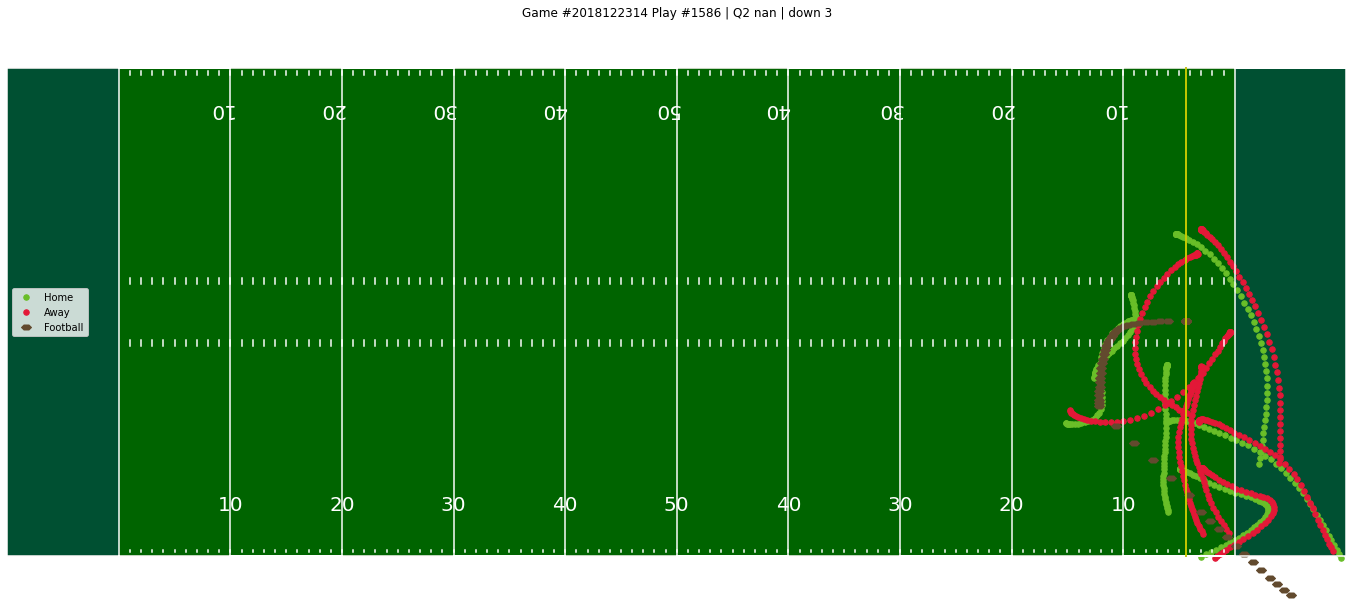

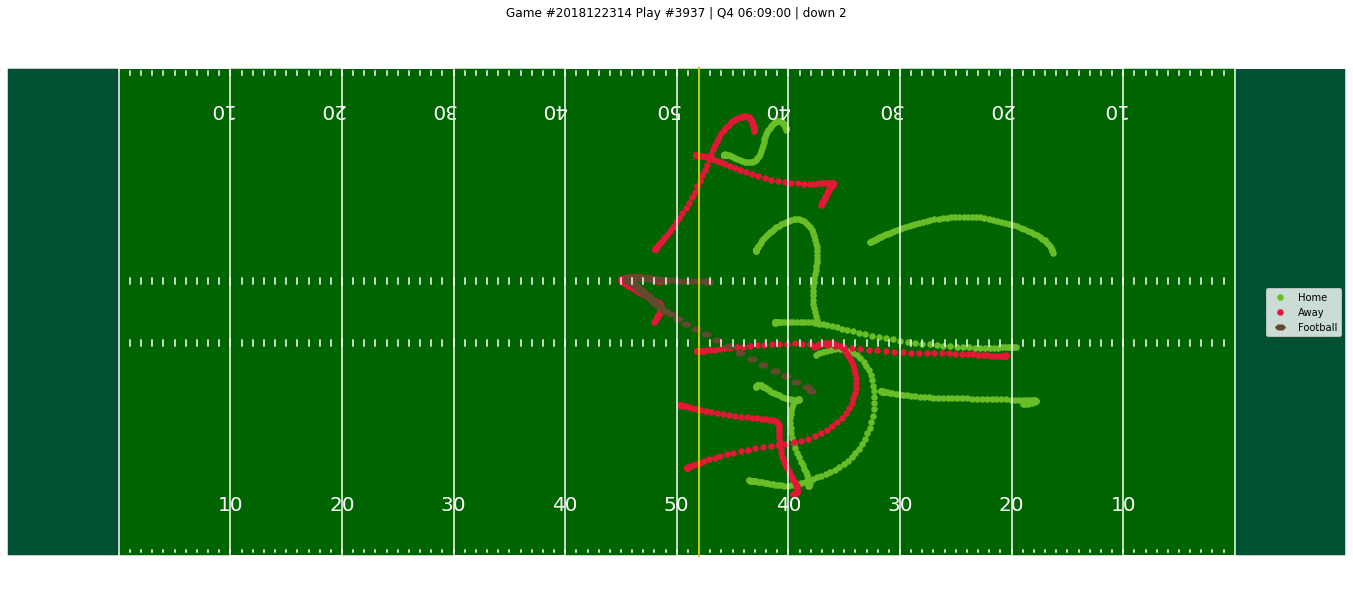

In [6]:
from plotter import *

# ex_game_id, ex_play_id = 2018090600, 75
for ex_game_id, ex_play_id in filter(lambda x: x[0] == 2018122314, tipped_plays):
    example_play_home = data.query('gameId == @ex_game_id and playId == @ex_play_id and team == "home"')
    example_play_away = data.query('gameId == @ex_game_id and playId == @ex_play_id and team == "away"')
    example_play_football = data.query('gameId == @ex_game_id and playId == @ex_play_id and team == "football"')

    los = data.query("playId == @ex_play_id and gameId==@ex_game_id")['los'].tolist()[0]
    playDir = data.query("playId == @ex_play_id and gameId==@ex_game_id")['playDirection'].tolist()[0]
    play = plays_df.query("playId == @ex_play_id and gameId==@ex_game_id").to_dict('records')[0]
    # print(play)
    firstDownLine = los+play['yardsToGo'] if playDir=='right' else los-play['yardsToGo']
    fig, ax = create_football_field(lineOfScrim=los, firstDownLine=firstDownLine, figscale=0.2)
    
    example_play_home.plot(x='x', y='y', kind='scatter', ax=ax, color='#69BE28', s=30, label='Home')
    example_play_away.plot(x='x', y='y', kind='scatter', ax=ax, color='#E31837', s=30, label='Away')
    example_play_football.plot(x='x', y='y', kind='scatter', ax=ax, color='#624a2e', s=100, label='Football', marker=ballPath)
    
    plt.title(f'Game #{ex_game_id} Play #{ex_play_id} | Q{play["quarter"]} {play["gameClock"]} | down {play["down"]}')
    plt.legend()
    plt.show()


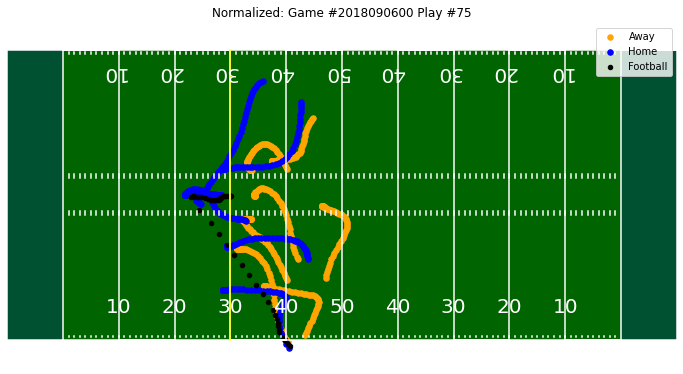

In [7]:
yl = train2021.query("playId == @ex_play_id")['los_norm'].tolist()[0]
fig, ax = create_football_field(highlight_line=True,
                                highlight_line_x=yl)
example_play_home.plot(x='x_norm', y='y_norm', kind='scatter', ax=ax, color='orange', s=30, label='Away')
example_play_away.plot(x='x_norm', y='y_norm', kind='scatter', ax=ax, color='blue', s=30, label='Home')
example_play_football.plot(x='x_norm', y='y_norm', kind='scatter', ax=ax, color='black', s=20, label='Football')
plt.title(f'Normalized: Game #{ex_game_id} Play #{ex_play_id}')
plt.legend()
plt.show()

In [24]:
data.query('gameId==2018122314 and playId==95 and displayName=="Football"')

,a,dir,dis,displayName,event,frameId,gameId,jerseyNumber,nflId,o,playDirection,playId,position,route,s,team,time,x,y,los,los_norm,x_norm,y_norm
1006214,0.00,NaN,0.00,Football,None,1,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:41.799Z,43.22,29.76,42.66,40,40.56,29.76
1006228,0.00,NaN,0.00,Football,None,2,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:41.900Z,43.22,29.76,42.66,40,40.56,29.76
1006242,0.00,NaN,0.00,Football,None,3,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:42.000Z,43.22,29.76,42.66,40,40.56,29.76
1006256,0.00,NaN,0.00,Football,None,4,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:42.099Z,43.22,29.76,42.66,40,40.56,29.76
1006270,0.00,NaN,0.00,Football,None,5,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:42.200Z,43.22,29.76,42.66,40,40.56,29.76
1006284,0.00,NaN,0.00,Football,None,6,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:42.299Z,43.22,29.76,42.66,40,40.56,29.76
1006298,0.00,NaN,0.00,Football,None,7,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,0.00,football,2018-12-24T01:24:42.400Z,43.22,29.76,42.66,40,40.56,29.76
1006312,0.49,NaN,0.50,Football,None,8,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,2.33,football,2018-12-24T01:24:42.500Z,43.70,29.63,42.66,40,41.04,29.63
1006326,2.97,NaN,0.37,Football,None,9,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,2.64,football,2018-12-24T01:24:42.599Z,43.33,29.65,42.66,40,40.67,29.65
1006340,4.86,NaN,0.31,Football,None,10,2018122314,NaN,NaN,NaN,right,95,NaN,NaN,3.21,football,2018-12-24T01:24:42.700Z,43.02,29.65,42.66,40,40.36,29.65
